In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
from sklearn.preprocessing import LabelEncoder

le_gen = LabelEncoder().fit(data['Gender'])
data['Gender'] = le_gen.fit_transform(data['Gender'])

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

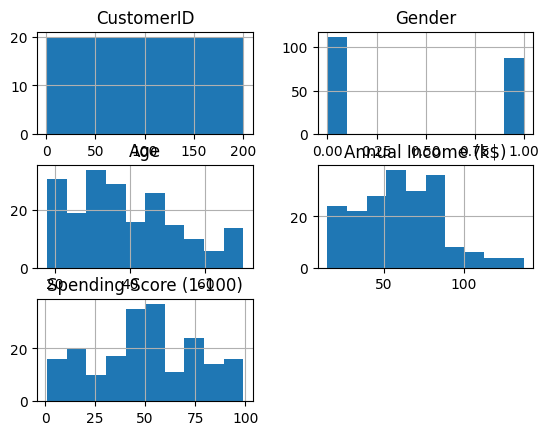

In [11]:
data.hist()

In [12]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [14]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
data = data[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


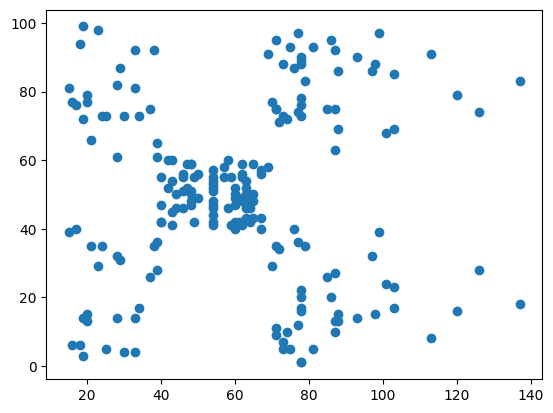

In [18]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [24]:
x = data[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].values
x[:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]])

In [66]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)
kmeans.fit(x)

KMeans(n_clusters=5, n_init=20)

In [67]:
kl = kmeans.labels_

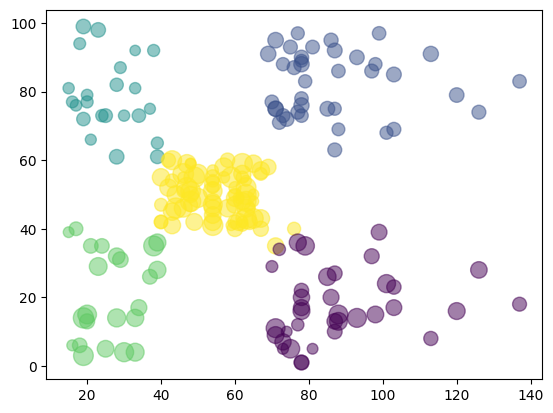

In [68]:
plt.scatter(x[:,2], x[:,3], c = kl, s = np.pi*x[:,1], alpha= 0.5)

In [70]:
agglom = AgglomerativeClustering(linkage='ward', n_clusters=5)
agglom.fit(x)

al = agglom.labels_

In [71]:
print(f'agglom = {gl[:5]}, kmeans = {kl[:5]}')

agglom = [0 0 0 0 0], kmeans = [3 2 3 2 3]


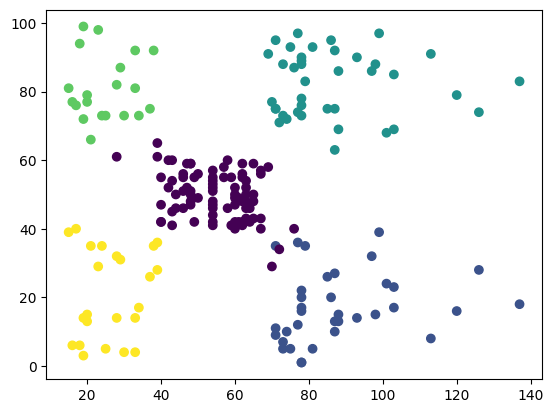

In [73]:
plt.scatter(x[:,2], x[:,3], c = al)

In [79]:
z = distance_matrix(x, x)
z

array([[  0.        ,  42.04759208,  33.04542328, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01999733, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.04542328,  75.01999733,   0.        , ..., 129.8807145 ,
        122.18837915, 143.77412841],
       ...,
       [117.1110584 , 111.7631424 , 129.8807145 , ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18837915, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77412841, ...,  14.35270009,
         65.03076195,   0.        ]])

In [82]:
hir = hierarchy.linkage(z)

/var/folders/f0/jlv7kmc54933ltbm2dzsh3k80000gn/T/ipykernel_745/4255936088.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hir = hierarchy.linkage(z)


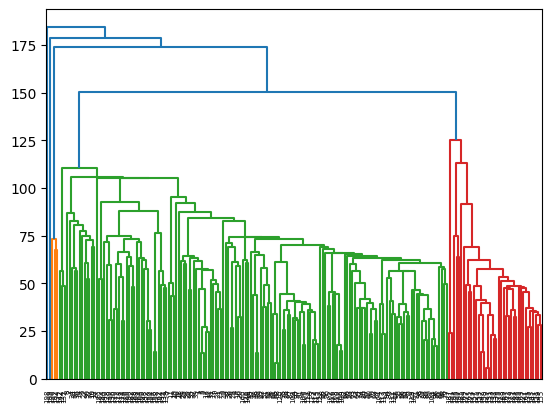

In [84]:
dendo = hierarchy.dendrogram(hir)

In [103]:
dbscan = DBSCAN(eps=12, min_samples=5)
dbscan.fit(x)
dl = dbscan.labels_

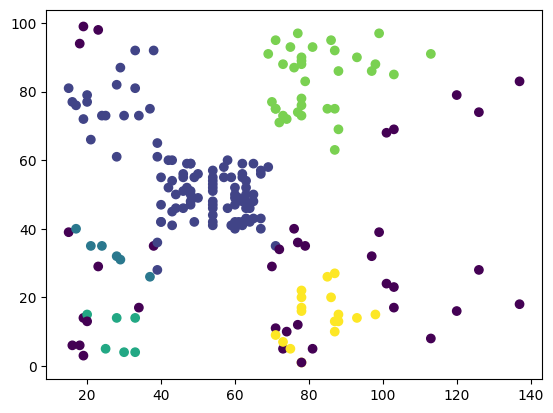

In [104]:
plt.scatter(x[:,2], x[:,3], c = dl)